In [1]:
from nhlscrapi.games.game import GameKey, Game
from nhlscrapi.games.cumstats import Corsi
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stat

In [3]:
nhl = {'date':[], 'home':[], 'away':[], 'referee1':[], 'referee2':[],\
       'linesmen1':[], 'linesmen2':[]}


for i in range(1,1083):
    gk = GameKey(2020,2,i)
    game = Game(gk)
    nhl['date'].append(game.matchup['date'])
    nhl['home'].append(game.matchup['home'])
    nhl['away'].append(game.matchup['away'])
    if len(list(game.refs.values())) != 0:
        nhl['referee1'].append(list(game.refs.values())[0])
        nhl['referee2'].append(list(game.refs.values())[1])
        nhl['linesmen1'].append(list(game.linesman.values())[0])
        nhl['linesmen2'].append(list(game.linesman.values())[1])
    else:
        nhl['referee1'].append('NA')
        nhl['referee2'].append('NA')
        nhl['linesmen1'].append('NA')
        nhl['linesmen2'].append('NA')
    if i % 25 == 0:
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [2]:
nhl_reg_2020 = pd.DataFrame.from_dict(nhl)
nhl_reg_2020.to_csv(r"C:\Users\rcpat\Desktop\IAA\Personal Projects\NHL Penalties\Data\NHL 2020.csv", index=False)

NameError: name 'nhl' is not defined

In [3]:
NHL_Pen = pd.read_csv(r'C:\Users\rcpat\Desktop\IAA\Personal Projects\NHL Penalties\Data\NHL Penalties.csv')
NHL_Games = pd.read_csv(r'C:\Users\rcpat\Desktop\IAA\Personal Projects\NHL Penalties\Data\NHL Games.csv')
NHL_Refs = pd.read_csv(r'C:\Users\rcpat\Desktop\IAA\Personal Projects\NHL Penalties\Data\NHL 2020.csv')

In [4]:
# Adjusting 'Date' columns to be read as dates
NHL_Pen['Date'] = pd.to_datetime(NHL_Pen['Date'])
NHL_Refs['date'] = pd.to_datetime(NHL_Refs['date'])
NHL_Games['Date'] = pd.to_datetime(NHL_Games['Date'])

In [5]:
# Sorting data frames to get the same order and index for each
NHL_Games = NHL_Games.sort_values(['Date','Home']).reset_index(drop=True)
NHL_Refs = NHL_Refs.sort_values(['date','home']).reset_index(drop=True)

In [6]:
# Assigning variable 'Game_ID' to be used 
NHL_Refs['Game_ID'] = NHL_Refs.index + 1
NHL_Games['Game_ID'] = NHL_Refs.index + 1

In [7]:
# Merge NHL Games Data with NHL Refs Data and dropping repeat variables
NHL = pd.merge(NHL_Games, NHL_Refs, how='inner', on='Game_ID').drop(['date','home','away'], axis=1)
NHL.columns

Index(['Date', 'Visitor', 'Home', 'Notes', 'Game_ID', 'referee1', 'referee2',
       'linesmen1', 'linesmen2'],
      dtype='object')

In [8]:
# Create Tables for Total Count of Linesmen and Referees
ref1 = NHL['referee1'].value_counts().reset_index()
ref2 = NHL['referee2'].value_counts().reset_index()
lines1 = NHL['linesmen1'].value_counts().reset_index()
lines2 = NHL['linesmen2'].value_counts().reset_index()

In [9]:
# Merge officials' tables to get total count
Refs = pd.merge(ref1,ref2, on='index', how='outer').rename(columns={'index':'Name'})
Linesmen = pd.merge(lines1,lines2, on='index').rename(columns={'index':'Name'})
Refs['Total'] = Refs['referee1'] + Refs['referee2']
Linesmen['Total'] = Linesmen['linesmen1'] + Linesmen['linesmen2']

In [10]:
Teams = list(NHL_Games['Home'].unique())
Team_Abv = {'Edmonton Oilers': 'EDM', 'St. Louis Blues': 'STL', 'Toronto Maple Leafs': 'TOR', 'Vegas Golden Knights': 'VGK',\
            'Anaheim Ducks': 'ANA', 'Carolina Hurricanes': 'CAR', 'Colorado Avalanche': 'COL', 'Dallas Stars': 'DAL',\
            'Nashville Predators': 'NSH', 'New York Rangers': 'NYR', 'Pittsburgh Penguins': 'PIT', 'Tampa Bay Lightning': 'TBL',\
            'Columbus Blue Jackets': 'CBJ', 'New Jersey Devils': 'NJD', 'New York Islanders': 'NYI', 'Philadelphia Flyers': 'PHI',\
            'San Jose Sharks': 'SJS', 'Arizona Coyotes': 'ARI', 'Buffalo Sabres': 'BUF', 'Calgary Flames': 'CGY', 'Florida Panthers': 'FLA',\
            'Ottawa Senators': 'OTT', 'Washington Capitals': 'WSH', 'Detroit Red Wings': 'DET', 'Vancouver Canucks': 'VAN',\
            'Chicago Blackhawks': 'CHI', 'Montreal Canadiens': 'MTL', 'Winnipeg Jets': 'WPG', 'Boston Bruins': 'BOS',\
            'Los Angeles Kings': 'LAK', 'Minnesota Wild': 'MIN'}

In [11]:
Team_Abbreviations = pd.DataFrame(((key, value) for key, value in Team_Abv.items()), columns=['Team','Abbreviation'])

In [12]:
# Total Penalties 2019-2020 Regular Season: 7808
print(len(NHL_Pen.index))
    
# For a total of 18206 minutes
sum(NHL_Pen['Minutes'])

7808


18206

                     Team  Minutes Abbreviation
0        New York Rangers    11.29          NYR
1           Anaheim Ducks    10.52          ANA
2     Tampa Bay Lightning    10.33          TBL
3     Washington Capitals    10.25          WSH
4         San Jose Sharks    10.19          SJS
5       New Jersey Devils     9.94          NJD
6           Boston Bruins     9.74          BOS
7         Ottawa Senators     9.74          OTT
8       Vancouver Canucks     9.32          VAN
9     Nashville Predators     8.96          NSH
10         Calgary Flames     8.91          CGY
11    Carolina Hurricanes     8.75          CAR
12     New York Islanders     8.66          NYI
13      Detroit Red Wings     8.65          DET
14     Colorado Avalanche     8.53          COL
15        Edmonton Oilers     8.49          EDM
16           Dallas Stars     8.48          DAL
17   Vegas Golden Knights     8.23          VGK
18         Minnesota Wild     8.12          MIN
19     Chicago Blackhawks     7.94      

[Text(0, 0, 'NYR'),
 Text(1, 0, 'ANA'),
 Text(2, 0, 'TBL'),
 Text(3, 0, 'WSH'),
 Text(4, 0, 'SJS'),
 Text(5, 0, 'NJD'),
 Text(6, 0, 'BOS'),
 Text(7, 0, 'OTT'),
 Text(8, 0, 'VAN'),
 Text(9, 0, 'NSH'),
 Text(10, 0, 'CGY'),
 Text(11, 0, 'CAR'),
 Text(12, 0, 'NYI'),
 Text(13, 0, 'DET'),
 Text(14, 0, 'COL'),
 Text(15, 0, 'EDM'),
 Text(16, 0, 'DAL'),
 Text(17, 0, 'VGK'),
 Text(18, 0, 'MIN'),
 Text(19, 0, 'CHI'),
 Text(20, 0, 'PHI'),
 Text(21, 0, 'PIT'),
 Text(22, 0, 'MTL'),
 Text(23, 0, 'STL'),
 Text(24, 0, 'WPG'),
 Text(25, 0, 'FLA'),
 Text(26, 0, 'CBJ'),
 Text(27, 0, 'BUF'),
 Text(28, 0, 'LAK'),
 Text(29, 0, 'TOR'),
 Text(30, 0, 'ARI')]

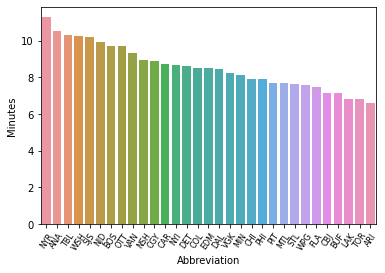

In [13]:
# Teams averaged anywhere between 6.58 and 11.29 minutes per game
# The Rangers were the most penalized at 11.29 min per game
# The Coyotes were the least penalized at 6.58 min per game

Avg_Pen_Per_Game = NHL_Pen[['Date','Team','Minutes']].groupby(['Date','Team']).\
                    sum().sort_values(by=['Date','Minutes'], ascending=[False,False]).\
                        groupby('Team').mean('Minutes').sort_values('Minutes', ascending=False).round(2).reset_index()
Avg_Pen_Per_Game = pd.merge(Avg_Pen_Per_Game,Team_Abbreviations, how='inner', on='Team')

print(Avg_Pen_Per_Game)

bar_pen = sns.barplot(x='Abbreviation', y='Minutes', data=Avg_Pen_Per_Game)
bar_pen.set_xticklabels(bar_pen.get_xticklabels(), rotation=55, horizontalalignment='center', size=8)


In [87]:
Avg_Drawn_Per_Game = NHL_Pen[['Date','Team','Minutes']].groupby(['Date','Team']).sum().reset_index()
Avg_Drawn_Per_Game.head(20)

,Date,Team,Minutes
0,2019-10-02,Edmonton Oilers,8
1,2019-10-02,Ottawa Senators,10
2,2019-10-02,San Jose Sharks,8
3,2019-10-02,St. Louis Blues,6
4,2019-10-02,Toronto Maple Leafs,6
5,2019-10-02,Vancouver Canucks,4
6,2019-10-02,Vegas Golden Knights,10
7,2019-10-02,Washington Capitals,4
8,2019-10-03,Anaheim Ducks,2
9,2019-10-03,Arizona Coyotes,2


In [90]:
away = pd.merge(NHL_Games, Avg_Drawn_Per_Game, how='left', left_on=['Date','Home'], right_on=['Date','Team'])[['Game_ID','Date','Visitor','Minutes']]
home = pd.merge(NHL_Games, Avg_Drawn_Per_Game, how='left', left_on=['Date','Visitor'], right_on=['Date','Team'])[['Game_ID','Date','Home','Minutes']]
away.head()

,Game_ID,Date,Visitor,Minutes
0,1,2019-10-02,Vancouver Canucks,8.0
1,2,2019-10-02,Washington Capitals,6.0
2,3,2019-10-02,Ottawa Senators,6.0
3,4,2019-10-02,San Jose Sharks,10.0
4,5,2019-10-03,Arizona Coyotes,2.0


                     Team  Total Abbreviation
0           Boston Bruins  10.51          BOS
1        New York Rangers  10.39          NYR
2      Colorado Avalanche  10.23          COL
3     Tampa Bay Lightning  10.02          TBL
4     Washington Capitals   9.74          WSH
5         San Jose Sharks   9.59          SJS
6     Nashville Predators   9.55          NSH
7       Vancouver Canucks   9.52          VAN
8       New Jersey Devils   9.37          NJD
9         Ottawa Senators   9.35          OTT
10          Winnipeg Jets   9.14          WPG
11    Philadelphia Flyers   9.01          PHI
12         Minnesota Wild   8.75          MIN
13       Florida Panthers   8.65          FLA
14         Calgary Flames   8.61          CGY
15          Anaheim Ducks   8.59          ANA
16    Carolina Hurricanes   8.54          CAR
17      Detroit Red Wings   8.46          DET
18     Chicago Blackhawks   8.35          CHI
19    Pittsburgh Penguins   8.33          PIT
20     New York Islanders   8.23  

[Text(0, 0, 'BOS'),
 Text(1, 0, 'NYR'),
 Text(2, 0, 'COL'),
 Text(3, 0, 'TBL'),
 Text(4, 0, 'WSH'),
 Text(5, 0, 'SJS'),
 Text(6, 0, 'NSH'),
 Text(7, 0, 'VAN'),
 Text(8, 0, 'NJD'),
 Text(9, 0, 'OTT'),
 Text(10, 0, 'WPG'),
 Text(11, 0, 'PHI'),
 Text(12, 0, 'MIN'),
 Text(13, 0, 'FLA'),
 Text(14, 0, 'CGY'),
 Text(15, 0, 'ANA'),
 Text(16, 0, 'CAR'),
 Text(17, 0, 'DET'),
 Text(18, 0, 'CHI'),
 Text(19, 0, 'PIT'),
 Text(20, 0, 'NYI'),
 Text(21, 0, 'LAK'),
 Text(22, 0, 'EDM'),
 Text(23, 0, 'DAL'),
 Text(24, 0, 'ARI'),
 Text(25, 0, 'STL'),
 Text(26, 0, 'VGK'),
 Text(27, 0, 'TOR'),
 Text(28, 0, 'BUF'),
 Text(29, 0, 'MTL'),
 Text(30, 0, 'CBJ')]

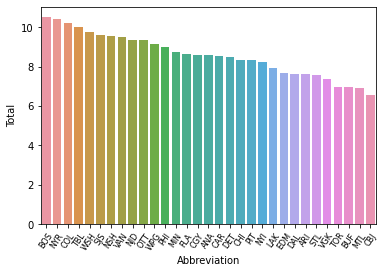

In [141]:
Sum_Away = away[['Visitor','Minutes']].groupby('Visitor').mean().reset_index()
Sum_Home = home[['Home','Minutes']].groupby('Home').mean().reset_index()

Avg_Pen_Drawn = pd.merge(Sum_Away,Sum_Home, how='inner', left_on='Visitor', right_on='Home')

Avg_Pen_Drawn['Total'] = (Avg_Pen_Drawn['Minutes_x'] + Avg_Pen_Drawn['Minutes_y'])/2

Avg_Pen_Drawn = Avg_Pen_Drawn.drop(axis=1, columns = ['Visitor','Minutes_x','Minutes_y']).sort_values('Total', ascending=False).\
                round(2).rename(columns={'Home':'Team'}).reset_index(drop=True)

Avg_Pen_Drawn = pd.merge(Avg_Pen_Drawn,Team_Abbreviations, how='inner', on='Team') 


print(Avg_Pen_Drawn)

bar_drawn = sns.barplot(x='Abbreviation', y='Total', data=Avg_Pen_Drawn)
bar_drawn.set_xticklabels(bar_drawn.get_xticklabels(), rotation=55, horizontalalignment='center', size=8)

In [148]:
Team_Pen_Summary = pd.merge(Avg_Pen_Per_Game, Avg_Pen_Drawn, how='inner', on = ['Team','Abbreviation']).\
                    rename(columns={'Minutes':'Minutes Taken','Total':'Minutes Drawn'})
Team_Pen_Summary = Team_Pen_Summary[['Team','Abbreviation','Minutes Taken','Minutes Drawn']]

Team_Pen_Summary['Difference'] = Team_Pen_Summary['Minutes Taken'] - Team_Pen_Summary['Minutes Drawn']
print(Team_Pen_Summary)



                     Team Abbreviation  Minutes Taken  Minutes Drawn  \
0        New York Rangers          NYR          11.29          10.39   
1           Anaheim Ducks          ANA          10.52           8.59   
2     Tampa Bay Lightning          TBL          10.33          10.02   
3     Washington Capitals          WSH          10.25           9.74   
4         San Jose Sharks          SJS          10.19           9.59   
5       New Jersey Devils          NJD           9.94           9.37   
6           Boston Bruins          BOS           9.74          10.51   
7         Ottawa Senators          OTT           9.74           9.35   
8       Vancouver Canucks          VAN           9.32           9.52   
9     Nashville Predators          NSH           8.96           9.55   
10         Calgary Flames          CGY           8.91           8.61   
11    Carolina Hurricanes          CAR           8.75           8.54   
12     New York Islanders          NYI           8.66           

[Text(0, 0, 'COL'),
 Text(1, 0, 'WPG'),
 Text(2, 0, 'FLA'),
 Text(3, 0, 'LAK'),
 Text(4, 0, 'PHI'),
 Text(5, 0, 'ARI'),
 Text(6, 0, 'BOS'),
 Text(7, 0, 'MIN'),
 Text(8, 0, 'PIT'),
 Text(9, 0, 'NSH'),
 Text(10, 0, 'CHI'),
 Text(11, 0, 'VAN'),
 Text(12, 0, 'TOR'),
 Text(13, 0, 'STL'),
 Text(14, 0, 'DET'),
 Text(15, 0, 'BUF'),
 Text(16, 0, 'CAR'),
 Text(17, 0, 'CGY'),
 Text(18, 0, 'TBL'),
 Text(19, 0, 'OTT'),
 Text(20, 0, 'NYI'),
 Text(21, 0, 'WSH'),
 Text(22, 0, 'NJD'),
 Text(23, 0, 'CBJ'),
 Text(24, 0, 'SJS'),
 Text(25, 0, 'MTL'),
 Text(26, 0, 'EDM'),
 Text(27, 0, 'VGK'),
 Text(28, 0, 'DAL'),
 Text(29, 0, 'NYR'),
 Text(30, 0, 'ANA')]

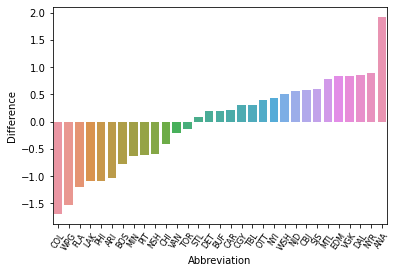

In [150]:
bar_diff = sns.barplot(x='Abbreviation', y='Difference', data=Team_Pen_Summary.sort_values('Difference'))
bar_diff.set_xticklabels(bar_diff.get_xticklabels(), rotation=55, horizontalalignment='center', size=8)